# Nettoyage et enrichissement des fichers de l'année 1914 du corpus CAMille

## Extraction de Keywords

### Imports

In [1]:
# Pour les Keywords
import os
import yake
# Pour les stopwords et le WordCloud
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image
# Pour le module SpaCy
from collections import defaultdict
import sys
import spacy
from spacy.lang.fr.examples import sentences
nlp = spacy.load('fr_core_news_md')
# Pour l'analyse de sentiments
import sys
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\imane\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Extraire les mots clés du document de l'année 1914 avec Yake

In [2]:
# Instantier l'extracteur de mots clés
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)
kw_extractor

In [3]:
# Lister les fichiers de l'année 1914
year = 1914
data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
len(txts)

100

In [4]:
# Les dix premiers fichiers
txts[:10]

['KB_JB838_1914-01-01_01-00004.txt',
 'KB_JB838_1914-01-02_01-00007.txt',
 'KB_JB838_1914-01-10_01-00004.txt',
 'KB_JB838_1914-01-14_01-00008.txt',
 'KB_JB838_1914-01-15_01-00002.txt',
 'KB_JB838_1914-01-16_01-00003.txt',
 'KB_JB838_1914-01-17_01-00004.txt',
 'KB_JB838_1914-01-21_01-00002.txt',
 'KB_JB838_1914-01-25_01-00007.txt',
 'KB_JB838_1914-01-29_01-00009.txt']

In [5]:
# Choisir un fichier
this_file = txts[96]
this_file

'KB_JB838_1914-08-09_01-00002.txt'

In [6]:
# Récupérer le texte du fichier
text = open(os.path.join(txt_path, this_file), 'r', encoding='utf-8').read()
text[:500]

'N*. ,• - r-wv," ,w„# \' n-• 9P v-v . Æ » «j»ij^wywg > i ? t \' VT v*y , wvntw !» LE SOIR ■ ■■ ■ ■ -■ ■* 9 AOUT. 1M4 1[ ;i i i r. ■ it f Blessés belges et allemands. Comme nous le disons plus haut, dans Je clinique delarue Jonfosse. où ces pauvres gens ont passé la Journée, on amena des blés* sés belges et allemands. . Un des Allemands avait reçu trois balles flfjy* la tête: Son état était désespéré. Un soldat belge du de.de ligne, blessé à la Jambe, raconte qu’il a roulé dans une tranchée. Un Alle'

In [7]:
# Extraire les mots clés de ce texte
keywords = kw_extractor.extract_keywords(text)
keywords

[('allemands', 0.003495276560567606),
 ('Liège', 0.0037129016090474477),
 ('belges', 0.004277252554924193),
 ('Belgique', 0.006704129104779977),
 ('belge', 0.007752520255800099),
 ('l’armée belge', 0.010052533603846671),
 ('soldat belge', 0.010278736473849371),
 ('soldats belges', 0.010278736473849371),
 ('défense de Liège', 0.013523955108474765),
 ('Bruxelles', 0.013585389078213267),
 ('soldats', 0.015072609452163838),
 ('Allemand', 0.0169770575798998),
 ('août', 0.019602510034847084),
 ('dit', 0.021805266421183196),
 ('peuple belge', 0.02193897570190001),
 ('l’armée', 0.023972216960993553),
 ('qu’il', 0.024132634782958972),
 ('L’armée allemande', 0.024729427194340407),
 ('Mme', 0.025663984112688693),
 ('Blessés belges', 0.027300071629827005),
 ('français', 0.027682054634093893),
 ('guerre', 0.0279876705636551),
 ('rue', 0.028312242701408214),
 ('ville', 0.028637281814554154),
 ('soldats allemands', 0.02950512112384638),
 ('troupes belges', 0.030904487376459937),
 ('soldat', 0.0344516

In [8]:
# Ne garder que les bigrammes
kept = []
for kw, score in keywords:
    words = kw.split()
    if len(words) == 2:
        kept.append(kw)
kept

['l’armée belge',
 'soldat belge',
 'soldats belges',
 'peuple belge',
 'L’armée allemande',
 'Blessés belges',
 'soldats allemands',
 'troupes belges',
 'Belges Paris',
 'L’année belge',
 'Liège Londres',
 'militaire allemand',
 'prisonniers allemands']

## Nuages de mots

### Stopwords

In [9]:
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "rossel", "dem", "faire", "alors", "juste", 
       "sujet", "au", "la", "sur", "aucuns", "le", "ta", "tandis", 
       "leur", "tellement", "avant", "là", "tels", "avec", "ma", "tes","avoir", 
       "maintenant", "ton", "bon", "car", "mais", "tous", "cela", "mes", "tout", "ce", 
       "mien", "trop", "moins", "très", "mon", "tu", "mot", "ces", "chaque", "voient", 
       "même", "vont", "ceux", "ni", "votre", "ci", "nommés", "vous", "comment", "comme", 
       "notre", "vu", "dans",  "nous", "ça", "des", "ou", "étaient", "dedans", "du", "où", 
       "état", "par",  "étions", "dehors", "parce", "été", "depuis", "pas", "être", "devrait", 
       "peut",  "doit", "peu", "donc", "plupart", "dos", "pour", "début", "pourquoi", "elle",  
       "quand", "elles", "que", "on", "quel", "encore", "quelle", "essai", "quelles",  "et", 
       "quels", "est", "qui", "eu", "sa", "fait", "son", "faites", "ses", "fois",  "seulement", 
       "font", "si", "hors", "sien", "ici", "sans", "il", "sont", "ils",  "sous", "je", "soyez"]
         
sw = set(sw)

### Créer un fichier contenant le texte de tous les journaux de l'année 1914

In [10]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r', encoding='utf-8') as f:
        content_list.append(f.read())

# Compter le nombre de fichiers dans la liste
len(content_list)

100

In [11]:
# Imprimer les 200 premiers caractères du contenu du 96ème fichier hors les symboles
content_list[96][275:475]

'amena des blés* sés belges et allemands. . Un des Allemands avait reçu trois balles flfjy* la tête: Son état était désespéré. Un soldat belge du de.de ligne, blessé à la Jambe, raconte qu’il a roulé d'

In [12]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r', encoding='utf-8') as f:
    before = f.read()

before[:500]

"tin drame de famille. — Tué,pâr:riJh père, • ^. ETCHARPE&. SKUN6S VERITABLES, ' Un‘des chanteurs français, lefi -jribs pôpu-.; 4#-cfiotx, &)%’mitais'; LILIV; m~, rivale, : ïàli^;-HtfiW'‘Pottî;i)lo?}cqnniuiço^^e.ift,€nf6j.ae.: c J ‘ ■ 1 - - * . * wiaw4 litni* /ïnr\\-û Æûa -nttf/irtïT^lJl^flC .1 1 • Fragson,* est mort liier,dans des cireaitatahces y ' tragiques. Il a été tué d’un coup de revolver !* ‘par son père, un vieillard;-de': 84 fttavfi’ant .^rftge-a altéré les facultés 1 meot&lesr ‘ ' ' 1 •"

## Nettoyer le fichier

### Créer la fonction de nettoyage à adapter et l'appliquer sur le fichier complet de l'année

In [13]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

clean_text(year, folder=temp_path)

'Output has been written in ../data/tmp/1914_clean.txt!'

In [14]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r', encoding='utf-8') as f:
    after = f.read()

after[:500]

'TIN DRAME FAMILLE TUÉ PÂR RIJH PÈRE ETCHARPE VERITABLES CHANTEURS FRANÇAIS LEFI JRIBS PÔPU CFIOTX MITAIS LILIV RIVALE ÏÀLI HTFIW POTTÎ CQNNIUIÇO IFT LITNI ÏNR ÆÛA NTTF IRTÏT LJL FLC FRAGSON MORT LIIER CIREAITATAHCES TRAGIQUES TUÉ COUP REVOLVER PÈRE VIEILLARD FTTAVFI ANT RFTGE ALTÉRÉ FACULTÉS MEOT LESR VOICI DRAME FAMILLE TFÔST PRODUIT FRAGSON OECUPAITAVEC SOB DÈTTJ AFTPAM MENT RUE FAYETTE PARLA VIEILLARD ÉTÛTT IRRITABLE AUEINTD SORTE FÔÏIEÉÉ NJIE PRENANT FORME DÉLIREDE JYQRSÉCD ITION FILS AMIE U'

## Nuage de mots

### Afficher les termes les plus fréquents de cette année

In [15]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('RUE', 4103), ('BRUXELLES', 1452), ('PRIX', 1038), ('ANS', 998), ('MAISON', 960), ('LOUER', 932), ('DÉS', 809), ('FILLE', 771), ('DEMANDE', 661), ('HEURES', 631)]


### Créer, stocker et afficher le nuage de mots

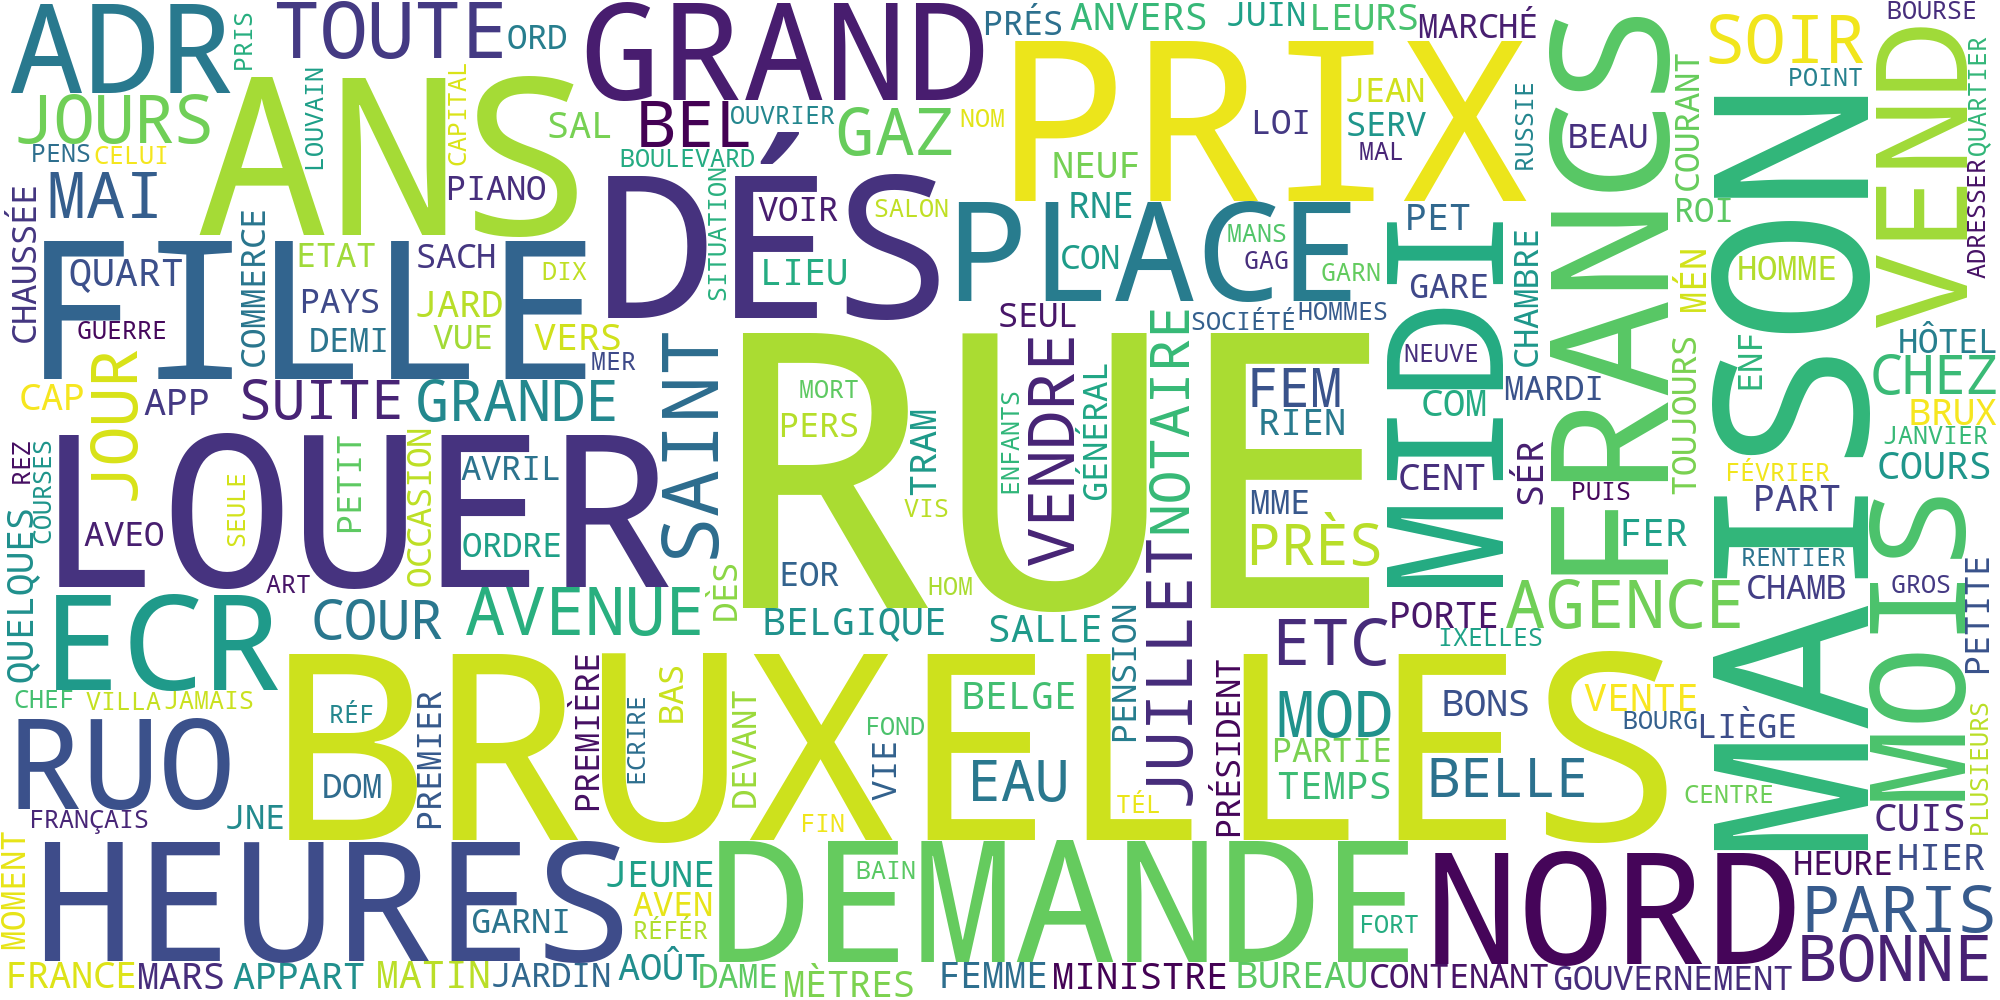

In [16]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))

## Reconnaissance d'entités nommées sur le corpus de l'année 1914 avec SpaCy 

In [17]:
# Charger le texte
n=100000
text = open(os.path.join(temp_path, f'{year}_clean.txt'), encoding='utf-8').read()[:n]


In [18]:
%%time
# Traiter le texte
doc = nlp(text)

CPU times: total: 5.31 s
Wall time: 5.4 s


In [19]:
# Compter les entités
people = defaultdict(int)
for ent in doc.ents:
    if ent.label_ == "PER" and len(ent.text) > 3:
        people[ent.text] += 1

In [20]:
# Trier et imprimer
sorted_people = sorted(people.items(), key=lambda kv: kv[1], reverse=True)

for person, freq in sorted_people[:50]:
    print(f"{person} apparait {freq} fois dans le corpus")

FÔÏIEÉÉ NJIE apparait 1 fois dans le corpus
DÉCÈS IACCESSÎBLE apparait 1 fois dans le corpus
RENDIT COMMISSARIAT RUE CROISADES INDIVIDUS apparait 1 fois dans le corpus
FRÉQUENT FERAEE GÉNÉRAL apparait 1 fois dans le corpus
IIR FANYLER apparait 1 fois dans le corpus
IMPRU DENCÉ apparait 1 fois dans le corpus
CONTRÉ DISTINCTION apparait 1 fois dans le corpus
FERMETÉ apparait 1 fois dans le corpus
RAPPORTEUR ARRIVE CELTE apparait 1 fois dans le corpus
RONCES ORDRE apparait 1 fois dans le corpus
CHERC PERS apparait 1 fois dans le corpus
RUS GONSEIL apparait 1 fois dans le corpus
CLORGE apparait 1 fois dans le corpus
FRANO RUO apparait 1 fois dans le corpus
RECEVEUR apparait 1 fois dans le corpus
ATELIER MARÉCHAL apparait 1 fois dans le corpus
REMÈDE EHRLLOH DÉSORMAIS TOUTE apparait 1 fois dans le corpus
FOURN POU apparait 1 fois dans le corpus
ÉRÂEQST LADUSTRIOL apparait 1 fois dans le corpus
OUN PARTIR apparait 1 fois dans le corpus
DISNOSIMC LIVERS apparait 1 fois dans le corpus
DISPONIB

## Sentiment analysis avec Textblob-FR

### Fonction

In [21]:
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

def get_sentiment(input_text):
    blob = tb(input_text)
    polarity, subjectivity = blob.sentiment
    polarity_perc = f"{100*abs(polarity):.0f}"
    subjectivity_perc = f"{100*subjectivity:.0f}"
    if polarity > 0:
        polarity_str = f"{polarity_perc}% positive"
    elif polarity < 0:
        polarity_str = f"{polarity_perc}% negative"
    else:
        polarity_str = "neutral"
    if subjectivity > 0:
        subjectivity_str = f"{subjectivity}% subjective"
    else:
        subjectivity_str = "perfectly objective"
    print(f"This text is {polarity_str} and {subjectivity_str}.")

### Analyser le sentiment de quelques phrases de l'année 1914 de notre corpus

In [22]:
get_sentiment("les Français s’étaient eux-mêmes coupé toute voie de communication avec le Luxembourg en détruisant le chemin de fer.")

This text is 14% positive and 0.03333333333333333% subjective.


In [23]:
get_sentiment("L'ambassadeur britannique exprime l’opinion que la note a été rédigée de manière à rendre la guerre inévitable.")

This text is 6% negative and 0.2% subjective.


In [24]:
get_sentiment("Les vers, longs de trois centimètres, s’avancent en colonnes et dévorent toute la verdure qu’ils trouvent sur leur chemin.")

This text is 9% negative and 0.1% subjective.


In [25]:
get_sentiment("Il paraît que la campagne est moche ?")

This text is 80% negative and 0.8% subjective.


In [26]:
get_sentiment("je voudrais mourir !")

This text is neutral and perfectly objective.


In [27]:
get_sentiment("Les victimes de l’assassin sont blessées, mais sauvées.")

This text is 40% negative and 0.15% subjective.


In [28]:
get_sentiment("Ce sera une des armes les plus formidables.")

This text is 40% positive and 0.55% subjective.


In [29]:
get_sentiment("Malgré leurs efforts répétés, les Allemands n’ont pu forcer la couverture française dans leurs combats d’avant-poste.")

This text is 10% positive and 0.05% subjective.


In [30]:
get_sentiment("180 personnes ont été sauvées, 20 cadavres ont été retrouvés.")

This text is neutral and perfectly objective.


In [31]:
get_sentiment("L'individu condamné à mort est, dans les vingt-quatre heures, passé par les armes.")

This text is 20% negative and 0.175% subjective.
